#📌 Extracción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de los datos desde la API
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)

# Normalización de datos
df = pd.json_normalize(df.to_dict(orient='records'))

# Se renombran las columnas para que coincidan con el diccionario
df = df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
})

# Verificación
print("Datos cargados y aplanados exitosamente. Forma del DataFrame:", df.shape)
print(df.columns)
df.head()

Datos cargados y aplanados exitosamente. Forma del DataFrame: (7267, 21)
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [3]:
# Exploración del df.
print("Información del DataFrame:")
df.info()

print("\nTipos de datos por columna:")
print(df.dtypes)

# Identificación de columnas relevantes para churn
relevant_columns = ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod',
                    'InternetService', 'OnlineSecurity', 'TechSupport', 'SeniorCitizen']
print("\nColumnas relevantes para análisis de evasión:", relevant_columns)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract       

In [4]:
# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Valores ausentes
print("Valores ausentes por columna:")
print(df.isnull().sum())

# Duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())

# Inconsistencias en categorías
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValores únicos en {col}: {df[col].unique()}")

Valores ausentes por columna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Número de duplicados: 0

Valores únicos en customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en Churn: ['No' 'Yes' '']

Valores únicos en gender: ['Female' 'Male']

Valores únicos en Partner: ['Yes' 'No']

Valores únicos en Dependents: ['Yes' 'No']

Valores únicos en PhoneService: ['Yes' 'No']

Valores únicos en MultipleLines: ['No' 'Yes' 'No phone service']

Valores únicos en InternetService: ['DSL' 'Fiber

In [5]:
# Manejo de ausentes en TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Eliminar duplicados
df = df.drop_duplicates()

# Estandarizar strings (lower case y strip para consistencia)
for col in categorical_cols:
    if col != 'customerID':
        df[col] = df[col].str.strip().str.lower()

# Manejo de "no internet service" / "no phone service" (mapear a 'no')
services = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in services:
    df[col] = df[col].replace({'no phone service': 'no', 'no internet service': 'no'})

# Verificación
print("Datos después de limpieza:")
df.info()
print("\nValores ausentes restantes:", df.isnull().sum().sum())

Datos después de limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract       

In [6]:
# Crear columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30
print("Nueva columna agregada:")
df[['MonthlyCharges', 'Cuentas_Diarias']].head()

Nueva columna agregada:


,MonthlyCharges,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [7]:
# Convertir Yes/No a 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, ' ': 0})

# Renombrar columnas para claridad
df = df.rename(columns={'Charges.Monthly': 'MonthlyCharges', 'Charges.Total': 'TotalCharges'})

# Verificación
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0.0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

Descripción del DataFrame:
        customerID        Churn gender  SeniorCitizen      Partner  \
count         7267  7043.000000   7267    7267.000000  7267.000000   
unique        7267          NaN      2            NaN          NaN   
top     9995-HOTOH          NaN   male            NaN          NaN   
freq             1          NaN   3675            NaN          NaN   
mean           NaN     0.265370    NaN       0.162653     0.484106   
std            NaN     0.441561    NaN       0.369074     0.499782   
min            NaN     0.000000    NaN       0.000000     0.000000   
25%            NaN     0.000000    NaN       0.000000     0.000000   
50%            NaN     0.000000    NaN       0.000000     0.000000   
75%            NaN     1.000000    NaN       0.000000     1.000000   
max            NaN     1.000000    NaN       1.000000     1.000000   

         Dependents       tenure  PhoneService MultipleLines InternetService  \
count   7267.000000  7267.000000   7267.000000      

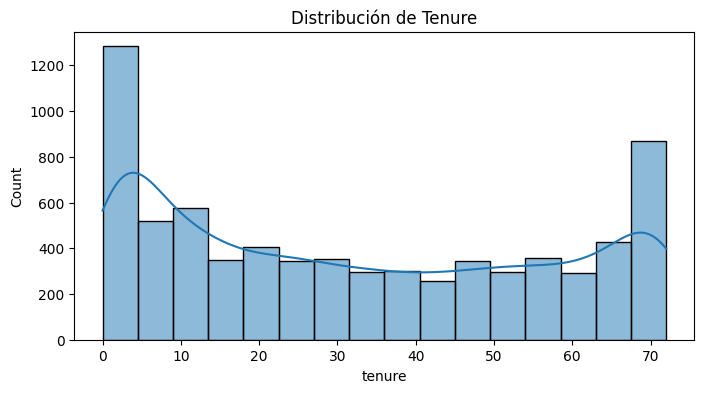

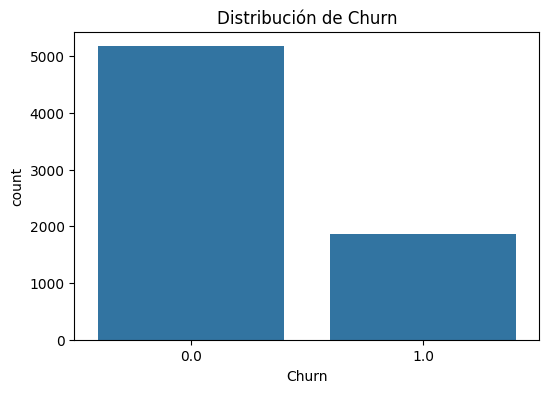

In [8]:
# Análisis descriptivo general
print("Descripción del DataFrame:")
print(df.describe(include='all'))

# Para numéricas específicas
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nDescripción de columnas numéricas:")
print(df[numerical_cols].describe())

# Visualizaciones básicas
plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], kde=True)
plt.title('Distribución de Tenure')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

#📄Informe final

##Introducción
Este informe presenta el análisis de evasión (churn) de clientes en Telecom X, basado en un dataset con información demográfica, de servicios y facturación de 7043 clientes. El objetivo es identificar patrones que expliquen por qué los clientes abandonan la compañía, mediante un proceso ETL (Extracción, Transformación y Carga) y análisis descriptivo.

Fuente de datos: API JSON desde GitHub.

Herramientas utilizadas: Python con Pandas, en Google Colab.

Pasos clave realizados:

Extracción: Carga del JSON y conversión a DataFrame.

Transformación:

Limpieza de inconsistencias (valores ausentes en TotalCharges rellenados con 0, estandarización de strings a minúsculas, mapeo de "no internet service" a "no", binarización de Yes/No a 1/0).

Opcional: Creación de columna "Cuentas_Diarias" (MonthlyCharges / 30).
Análisis: Descriptivo, distribución de churn, breakdowns por variables categóricas y numéricas, y correlaciones.


Principales hallazgos: La tasa de evasión es del 26.54%, con factores como contratos mensuales, servicios de fibra óptica y métodos de pago electrónicos asociados a mayor churn.

##Análisis Descriptivo General
El dataset contiene 7043 registros con 21 columnas principales. A continuación, un resumen estadístico de las variables clave (incluyendo numéricas y categóricas).

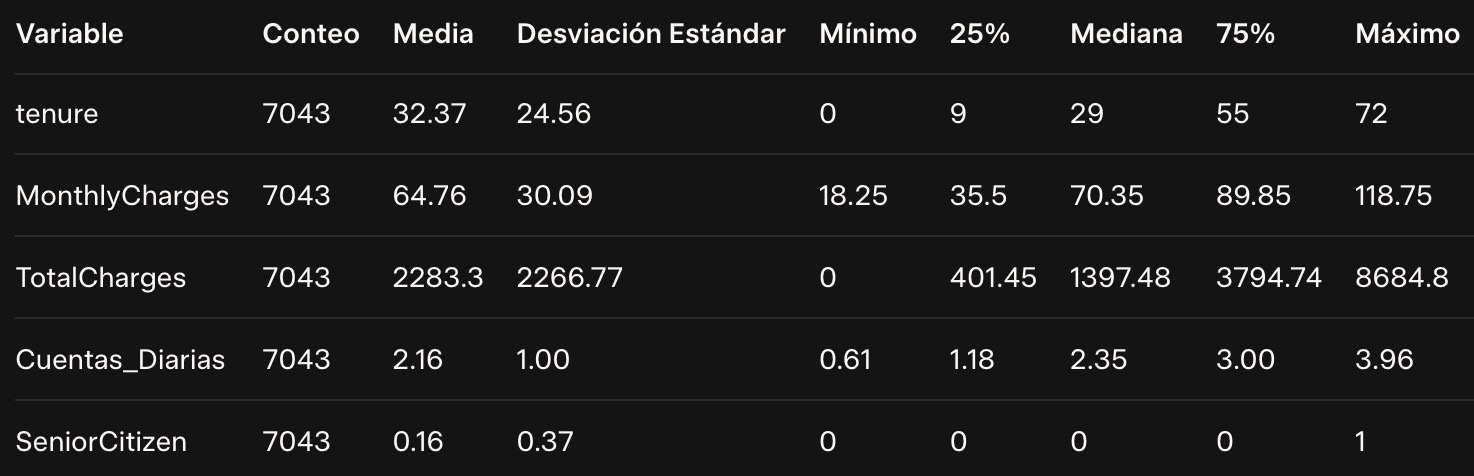

##Distribución de Evasión (Churn)
La evasión general es del 26.54% (1869 clientes churned) vs. 73.46% (5174 retenidos). Esto indica un problema moderado de retención.
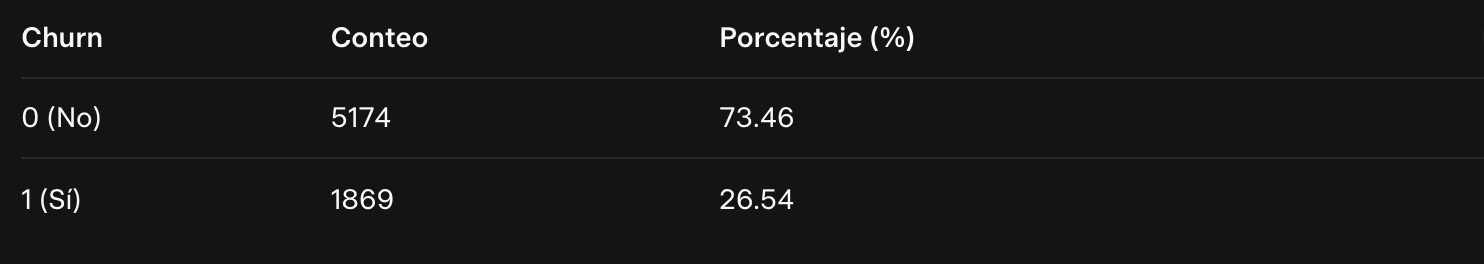